In [1]:
import numpy as np
import pandas as pd
from IPython import display


# Presentaiton du jeu de données 

### Les exemples de ce cours sont basés sur le jeu de données [Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/Bank%2BMarketing)

### Les variables
 *   age: age in years (numeric)
 *  job: the customer's job category (categorical)
 *  marital:the customer's marital status (categorical)
 *   education: the customer's education level (ordinal)
 *   default: whether the customer has a loan in default (categorical)
 *    housing: whether the customer has a housing loan (categorical)
 *    loan: whether the customer has a presonal loan (categorical)
    ...
 *   y: how the customer responded to a marketing campaign (target variable)




# Fonctionnalitées basiques


* **CSV** est le format le plus utilisé pour stocker des données tabulaires
  * read_csv() : fonction pour charger un DataFrame depuis un fichier CSV
  * to_csv() : méthode pour sauvgarder un DataFrame au format CSV sur disque
  
<span style='color:Red'> => D'autres fonctions permettent de manipuler d'autres formats de fichiers.  </span>



In [2]:
bank = pd.read_csv("./data/bank.csv", sep = ";")

* **head() et tail** sont des méthodes permettent d'observer les premières et dernières lignes du DataFrame

In [3]:
bank.head() # view the first rows of the DataFrame (Default : 5 )

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
bank.tail() # view the last rows of the DataFrame (Default : 5 )

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no



* **shape** permet de récupérer la structure d'un objet DataFrame ou Series
* **columns** permet d'afficer les différentes colonnes d'un DataFrame
* **dtypes** permet de récupérer le type de chaque colonnes 

Pandas se base sur les dtypes existant en <span style='color:Blue'> NumPy </span> 
Pandas représente les types strings par : object dtype (par défault) ou StringDetype (recommandé)

In [5]:
bank.shape # nb rows and nb columns

(4521, 17)

In [81]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'loan_count', 'richer_than_average',
       'senior', 'young_adult'],
      dtype='object')

In [6]:
bank.dtypes 

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

* **info** méthode qui permet de récupérer quelques informations techniques sur le jeu de données <br>
    * L'index des lignes (<span style = 'color:Blue'> RangeIndex </span>)
    * Le nombre de colonnes
    * Pour chaque colonne : le nom, le nombre de valeurs non nulles et le type
    * Le nombre de colonnes par type de données 
    * La mémoire utilisée pour le stockage

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


* **describe** méthode qui affiche quelques statistiques descriptives sur les données numériques

In [8]:
bank.describe().T # Transpose for better readability

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


* **value_counts()** méthode qui calcule le nombre d'occurences pour chaque valeur d'une série ou d'un DataFrame <br>
l'ajout du paramètre normalize=True permet de faire le calcul en pourcentage 

In [9]:
bank["marital"].value_counts() # Count occurences of each marital status (can be used for numerical data)

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

* **Selection de colonne(s)** cela se fait en spécifiant le/les nom avec la syntaxe : **<span style='color:Blue'> df[col] </span>** ou **<span : style='color:Blue'> df[[col1,col2,...]] </span>**



In [5]:
bank["marital"].value_counts(normalize="True") # Add normalize to get percentage

married     0.618668
single      0.264543
divorced    0.116788
Name: marital, dtype: float64

In [6]:
bank[["marital","housing"]].value_counts() # value_counts count occurence of rows 

marital   housing
married   yes        1625
          no         1172
single    yes         636
          no          560
divorced  yes         298
          no          230
dtype: int64

In [7]:
bank[["marital","housing"]].value_counts(normalize="True")

marital   housing
married   yes        0.359434
          no         0.259235
single    yes        0.140677
          no         0.123866
divorced  yes        0.065915
          no         0.050874
dtype: float64

In [8]:
jobs = bank["job"]

In [9]:
type(jobs)

pandas.core.series.Series

In [10]:
jobs.head()

0     unemployed
1       services
2     management
3     management
4    blue-collar
Name: job, dtype: object

In [11]:
bank[["age","education","job","loan"]].head()

,age,education,job,loan
0,30,primary,unemployed,no
1,33,secondary,services,yes
2,35,tertiary,management,no
3,30,tertiary,management,yes
4,59,secondary,blue-collar,no


* **Supression de colonne(s):** On peut supprimer avec la méthode <span style='color:Blue'> drop() </span><br>
    * Ne pas oublier de spécifier axis=1 (Sinon supression de ligne)
    * Ajouter inplace=True si on veut modifier le DataFrame original
    

* 2 raisons pour lesquelles on peut recourir à la supression de colonnes :
    * Garder les variables pertinentes pour l'analyse 
    * Garder les variables compatibles à certains modèles de machine learning (Exemple : modèles spécifiques au variables numériques)


In [12]:
bank_without_dropped_cols = bank.drop(["balance","day","month","duration","pdays","previous"], axis=1)
bank_without_dropped_cols.head()

,age,job,marital,education,default,housing,loan,contact,campaign,poutcome,y
0,30,unemployed,married,primary,no,no,no,cellular,1,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,1,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,1,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,4,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,1,unknown,no


In [13]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


* **Filtrage des lignes :** On peut supprimer des lignes en utilisant un filtre booléen <span style='color:Blue'> df[bool_filter] </span> <br>
    * Le filtre supprimera toutes les lignes contenant False à la position i et gardera le reste 
    * Souvent le filtre invoque des conditions directement sur les colonnes(Exemple : Garder que les clients mariés, garder que les clients agés de plus de 30 ans, etc.)
    * On peut combiner plusieurs conditions en utilisant les opérateurs de logiques (&, |, ~)
    

* 2 raisons pour lesquelles on peut recourir au filtrage des lignes :
    * Limiter l'analyse à des populations précises de notre jeu de données 
    * Supprimmer les lignes non cohérences (Exemple : age > 100)
    * Sous échantilloner pour des raisons de performance 


In [14]:
clients_of_interest = bank[
  (bank["marital"]=="married")  &
  (bank["age"]>40)  &
  (bank["job"]=="unemployed")
]

clients_of_interest.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
108,56,unemployed,married,primary,no,3391,no,no,cellular,21,apr,243,1,-1,0,unknown,yes
239,51,unemployed,married,tertiary,no,1634,yes,no,cellular,22,jul,168,4,-1,0,unknown,no
326,51,unemployed,married,secondary,no,1760,no,yes,cellular,19,nov,162,1,-1,0,unknown,no
460,55,unemployed,married,tertiary,no,383,no,no,unknown,6,may,343,3,-1,0,unknown,no
568,59,unemployed,married,primary,no,0,no,no,cellular,30,jan,3025,2,-1,0,unknown,no


* **sort_values():** est une méthode permettant de trier un objet DataFrame ou Series
    * Le tri se fait à partir d'une ou plusieurs colonnes de manière ascendante ou descendance
    * Utilier inplace=True pour modifier le DataFrame originalm

In [15]:
bank_sorted = bank.sort_values(by="age")
bank_sorted.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
503,19,student,single,primary,no,103,no,no,cellular,10,jul,104,2,-1,0,unknown,yes
1900,19,student,single,unknown,no,0,no,no,cellular,11,feb,123,3,-1,0,unknown,no
2780,19,student,single,secondary,no,302,no,no,cellular,16,jul,205,1,-1,0,unknown,yes
3233,19,student,single,unknown,no,1169,no,no,cellular,6,feb,463,18,-1,0,unknown,no
999,20,student,single,secondary,no,291,no,no,telephone,11,may,172,5,371,5,failure,no
1725,20,student,single,secondary,no,1191,no,no,cellular,12,feb,274,1,-1,0,unknown,no
13,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown,yes
3362,21,student,single,secondary,no,6,no,no,unknown,9,may,622,1,-1,0,unknown,no
2289,21,student,single,secondary,no,681,no,no,unknown,20,aug,6,1,-1,0,unknown,no
110,21,student,single,secondary,no,2488,no,no,cellular,30,jun,258,6,169,3,success,yes


In [16]:
# sort the data by decreasing alphabetical order of marital status and education, and increasing order of age
bank_sorted = bank.sort_values(by=["marital","education","age"], ascending=[False,False,True])
bank_sorted.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1900,19,student,single,unknown,no,0,no,no,cellular,11,feb,123,3,-1,0,unknown,no
3233,19,student,single,unknown,no,1169,no,no,cellular,6,feb,463,18,-1,0,unknown,no
2703,21,student,single,unknown,no,137,yes,no,unknown,12,may,198,3,-1,0,unknown,no
1241,22,student,single,unknown,no,549,no,no,cellular,2,sep,154,1,-1,0,unknown,no
1543,22,student,single,unknown,no,47,no,no,cellular,3,jul,69,3,-1,0,unknown,no
2565,23,blue-collar,single,unknown,no,817,yes,no,cellular,18,may,123,1,-1,0,unknown,no
2621,24,blue-collar,single,unknown,no,431,yes,no,unknown,3,jun,108,12,-1,0,unknown,no
3200,24,student,single,unknown,no,3298,yes,no,unknown,28,may,227,1,-1,0,unknown,no
1870,25,student,single,unknown,no,10788,no,no,cellular,23,dec,102,2,210,2,other,no
357,27,management,single,unknown,no,3196,no,no,cellular,9,feb,10,2,-1,0,unknown,no


# Indexing de lignes et de colonnes 

* 2 méthodes existent pour indexer un DataFrame :
    * Indexation par label <span style='color:Red'>.loc </span> :
        * Syntaxe : **<span style='color:Blue'>df.loc[row_label_index,col_label_index] </span>** <br>
        
    * Indexation par position <span style='color:Red'>.iloc </span> :
        * Syntaxe : **<span style='color:Blue'>df.iloc[row_pos_index,col_pos_index] </span>** <br>
        
<span style='color:Red'>=> Les mêmes règles de slicing que NumPy </span>

In [17]:
bank.iloc[:10,2:5] # Get the first 10 rows and columns from 2 to 4 

,marital,education,default
0,married,primary,no
1,married,secondary,no
2,single,tertiary,no
3,married,tertiary,no
4,married,secondary,no
5,single,tertiary,no
6,married,tertiary,no
7,married,secondary,no
8,married,tertiary,no
9,married,primary,no


In [18]:
bank.loc[[1,3,5,10,20],["job","marital"]]

,job,marital
1,services,married
3,management,married
5,management,single
10,services,married
20,management,divorced


In [19]:
bank.loc[:,"balance":"duration"].head(10) # Label slices include the last label

,balance,housing,loan,contact,day,month,duration
0,1787,no,no,cellular,19,oct,79
1,4789,yes,yes,cellular,11,may,220
2,1350,yes,no,cellular,16,apr,185
3,1476,yes,yes,unknown,3,jun,199
4,0,yes,no,unknown,5,may,226
5,747,no,no,cellular,23,feb,141
6,307,yes,no,cellular,14,may,341
7,147,yes,no,cellular,6,may,151
8,221,yes,no,unknown,14,may,57
9,-88,yes,yes,cellular,17,apr,313


In [20]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


# Data Cleaning

* Dans les cas d'usage de data science réels, un jeu de données n'est jamais propre et nécessite souvent d'être nettoyer aprés l'exploration afin de constituer un input propre aux modèles de Machine Leaning <br>

* Un jeu de données non propre peut contenir : 
   * Des doublons
   * Des valeurs manquantes 
   * Outliers(Valeurs extrèms)
        * exemple : age > 120, salaire > 1000000
   * Valeurs fausses :
        * exemple : age = -20
   * Mauvais encodoage d'une variable catégorielle
        * exemple : "unemployed", "Unemployed", "Unemployd", ...
       

<span style='color:Red'> => Il est indispensable de nettoyer le jeu de données avant toute démarche de machine learning!!! </span>

In [38]:
persons = pd.read_csv("./data/persons.csv")
persons

,first,last,age,children
0,John,Doe,24,0.0
1,Jane,Doe,21,1.0
2,NaN,Trevor,NaN,4.0
3,Undefined,Smith,34,3.0
4,Will,Snow,Unknown,NaN
5,Sarah,Sanders,20,0.0
6,James,Steward,45,NaN
7,Jane,Doe,21,1.0
8,Will,Tylor,21,1.0


* **Supprimer les doublons :** On peut vérifier si il existe des doublons graçe à la méthode duplicated()  <br>
    * Utiliser drop_duplicates() pour supprimer les doublons depuis un objet DataFrame ou Series
    * Utiliser inplace=True pour modifier le DataFrame original
    * Utiliser l'argument subset pour limiter les colonnes sur lesquelles on cherche des doublons
    * Utiliser l'argument keep (first, last, drop) pour indiquer l'action une fois les doublons trouver (Les supprimer ? Garder le premier ? Le dernier)
    




In [39]:
persons.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8    False
dtype: bool

In [42]:
persons.drop_duplicates()
#persons.drop_duplicates(subset=['age', 'children'])

,first,last,age,children
0,John,Doe,24,0.0
1,Jane,Doe,21,1.0
2,NaN,Trevor,NaN,4.0
3,Undefined,Smith,34,3.0
4,Will,Snow,Unknown,NaN
5,Sarah,Sanders,20,0.0
6,James,Steward,45,NaN
8,Will,Tylor,21,1.0


In [43]:
persons.dtypes # age typed as a string (beacause of Unknown), children as float because of NaN

first        object
last         object
age          object
children    float64
dtype: object

* 2 principales stratégies pour traiter les valeurs manquantes 
    * Suprrimer les lignes ou colonnes contenant des valauers manquantes (Que sur les grands jeux de données ou si la colonne n'est pas importante)                                                     
    * Remplacer les valeurs manquantes 
        * Stratégie simple : Exemple : remplacer par une constance, par la moyenne de la colonne, par la mediane...
        * Stragégie avancée : Exemple : utiliser un algorithme de machine learning comme KNN (k-nearest neighbors)

                                    

* Pour supprimer, on utilise la méthode dropna()
    * Arguments importants : 
        * axis: supprimer par ligne (0) ou par colonne (1)
        * how: supprimer si toutes les valeurs sont manquantes ("all") ou si aucune n'est manquante ("any")
        * subset: les colonnes à regarder pour supprimer les valeurs manquantes
        * inplace: si True, l'opération se fait sur le DataFrame original 



* Pour remplacer les valeurs manquantes avec la stratégie simple, on utilise fillna
    * Arguments importants :
        * value: valeur par laquelle je veux remplacer
        * axis: imputer les valeurs manquantes par ligne (0) ou par colonne (1)
        * inplace: si True, l'opération se fait sur le DataFrame original 


In [50]:
persons.dropna() # drop rows with missing values on any of the columns 

,first,last,age,children
0,John,Doe,24,0.0
1,Jane,Doe,21,1.0
3,Undefined,Smith,34,3.0
5,Sarah,Sanders,20,0.0
7,Jane,Doe,21,1.0
8,Will,Tylor,21,1.0


In [44]:
persons.dropna(subset=["first","age"]) # drop rows with missing values on first or age columns , or both

,first,last,age,children
0,John,Doe,24,0.0
1,Jane,Doe,21,1.0
3,Undefined,Smith,34,3.0
4,Will,Snow,Unknown,NaN
5,Sarah,Sanders,20,0.0
6,James,Steward,45,NaN
7,Jane,Doe,21,1.0
8,Will,Tylor,21,1.0


In [45]:
persons.dropna(subset=["first","age"],how="all") # drop rows with missing values on both first and age

,first,last,age,children
0,John,Doe,24,0.0
1,Jane,Doe,21,1.0
3,Undefined,Smith,34,3.0
4,Will,Snow,Unknown,NaN
5,Sarah,Sanders,20,0.0
6,James,Steward,45,NaN
7,Jane,Doe,21,1.0
8,Will,Tylor,21,1.0


In [46]:
persons.fillna(999) # replace all missing values with 999

,first,last,age,children
0,John,Doe,24,0.0
1,Jane,Doe,21,1.0
2,999,Trevor,999,4.0
3,Undefined,Smith,34,3.0
4,Will,Snow,Unknown,999.0
5,Sarah,Sanders,20,0.0
6,James,Steward,45,999.0
7,Jane,Doe,21,1.0
8,Will,Tylor,21,1.0


* **Le type des variables** en Data Science est trés important
    * Les variables binaires doivent être encondées avec le type booléen (0 or 1)
    * Les variables quantitatives discrêtes encodées avec le type integer
    * Les variables catégorielles doivent être encodées en dummy (Plus tard dans le cours) 
    
    
* Pour encoder proprement les variables :
    * On utilise la méthode convert_dtypes(): Pandas convertit vers les types qu'il considère comme les plus appropriés
    * On utilise la méthode astype() pour choisir le nouveau type de la variable 




In [58]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [61]:
bank = bank.convert_dtypes()
bank.dtypes

age           Int64
job          string
marital      string
education    string
default      string
balance       Int64
housing      string
loan         string
contact      string
day           Int64
month        string
duration      Int64
campaign      Int64
pdays         Int64
previous      Int64
poutcome     string
y            string
dtype: object

In [63]:
for col in ["default","housing","loan","y"]:
    bank[col] = (bank[col]=="yes").astype(int)

In [64]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0



* **Création de nouvelles données** : Les méthodes de machine learning nécessite souvent une étape de "feature engineering", i.e, création de nouvelles variables à partir de celles existantes en se basant sur la connaissance métier de la problématique et sur l'intuition


* Examples de feature engineering :
    * Extraction jour de la semaine, mois, année, etc. depuis une variable date
    * Extraction pays, état, département, etc. depuis des coordonnées géographiques
    * One-hot encoding (Plus tard dans le cours)
    * Log-transformation (Ou autre transformation mathématique)
    * etc.


In [67]:
bank["loan_count"] = bank["loan"] + bank["housing"] # the count of the customer's loans
bank["richer_than_average"] = (bank["balance"] > bank["balance"].mean()).astype(int) # 1 if account balance > mean
bank["senior"] = (bank["age"]>60).astype(int)
bank["young_adult"] = (bank["age"]>25).astype(int)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,loan_count,richer_than_average,senior,young_adult
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,...,79,1,-1,0,unknown,0,0,1,0,1
1,33,services,married,secondary,0,4789,1,1,cellular,11,...,220,1,339,4,failure,0,2,1,0,1
2,35,management,single,tertiary,0,1350,1,0,cellular,16,...,185,1,330,1,failure,0,1,0,0,1
3,30,management,married,tertiary,0,1476,1,1,unknown,3,...,199,4,-1,0,unknown,0,2,1,0,1
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,...,226,1,-1,0,unknown,0,1,0,0,1



* **One Hot Enconding** : Le OneHotEncoding est une méthode pour encoder les variables catégorielles
    * La variable est transformée en multiples colonnes
    * Chaque colonne représente une catégorie 
    * Utiliser la fonction get_dummies()pour one-hot encoder les colonnes catégorielles
    
<span style='color:Red'> => Exemple ci-dessous : </span>



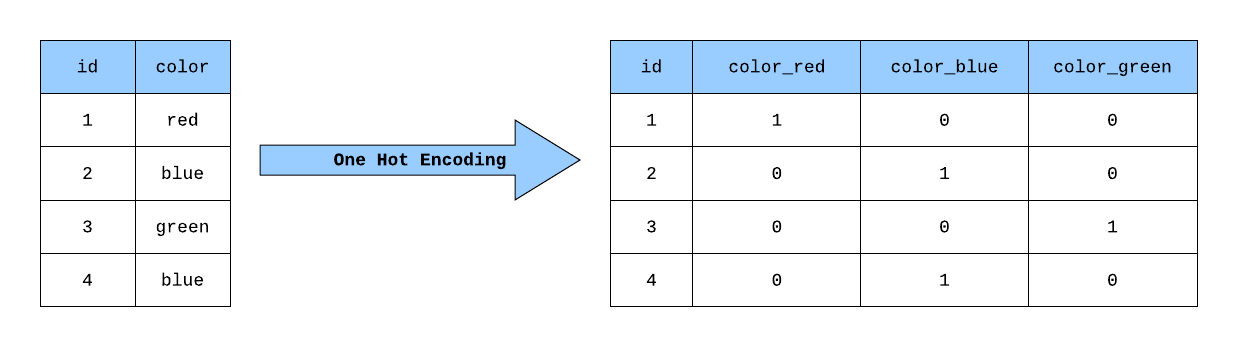

In [49]:
display.Image("./data/1 ggtP4a5YaRx6l09KQaYOnw.png")

In [50]:
# Dummy encode the education variable, join the dummy variables to the data frame (more on joins later), 
# and drop the original column 

bank.join(pd.get_dummies(bank["education"],prefix="education")).drop("education",axis=1)

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,education_primary,education_secondary,education_tertiary,education_unknown
0,30,unemployed,married,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,1,0,0,0
1,33,services,married,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0,1,0,0
2,35,management,single,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0,0,1,0
3,30,management,married,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0,0,1,0
4,59,blue-collar,married,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,0,1,0,0
4517,57,self-employed,married,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,0,0,1,0
4518,57,technician,married,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,0,1,0,0
4519,28,blue-collar,married,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,0,1,0,0


# Aggregation et GroupBy

* **Group by** : est un processus en 3 étapes : 
    * Division du DataFrame en groupe selon un ou plusieurs critères
    
    * Application d'une fonction pour chaque groupe séparément 
        * Aggregation (Exemple : calculer des statistiques descriptives, ...)
        * Transformation (Exemple : Imputation des Nans par la moyenne de chaque groupe, ...) 
        * Filtrage (Exemple : Supprimer un ou plusieurs groupes selon des agrégats, ...)   
        
    * Combinaison des résultats de chaque groupe dans un seul DataFrame 
    



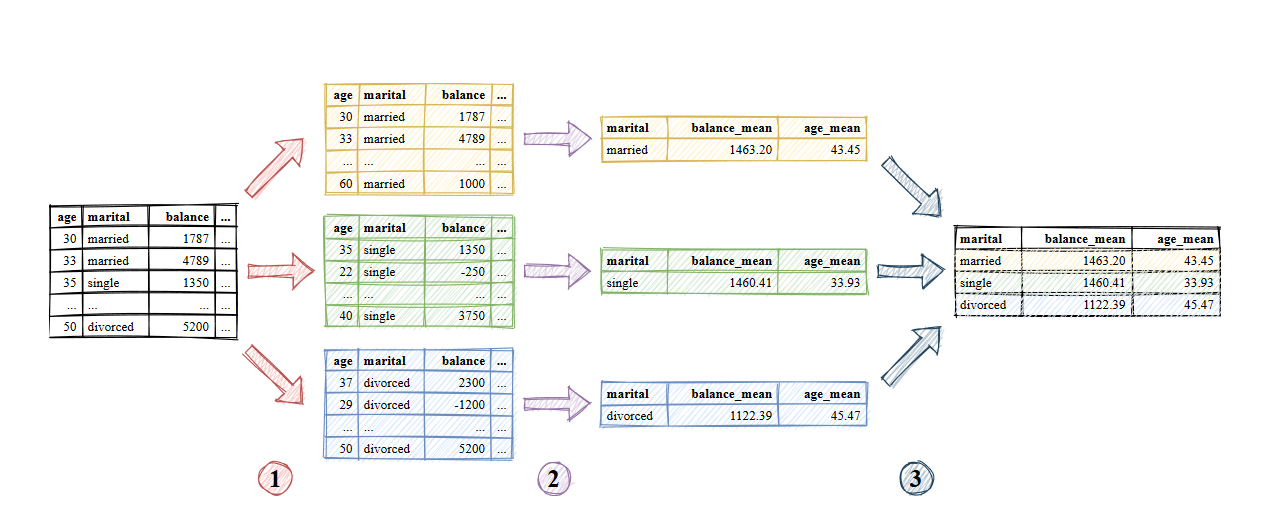

In [51]:
display.Image("./data/groupby.png")

In [79]:
# group by marital status and calculate min, max and mean balance and median age for each group
bank.groupby(["marital"]).aggregate(
    {"balance" : ["min","max","mean"],
    "age" : "median"}
)

balance                        age
             min    max         mean median
marital                                    
divorced   -1148  26306  1122.390152   45.0
married    -3313  71188  1463.195567   42.0
single     -1313  27733  1460.414716   32.0

In [72]:
# group by marital status and education
# calculate median balance, mean age, std age and number of rows for each group 
bank.groupby(
["marital","education"]
).aggregate(
    balance_median = ("balance","median"),
    age_mean = ("age","mean"),
    age_std = ("age","std"),
    count = ("marital","count")
)

balance_median   age_mean    age_std  count
marital  education                                             
divorced primary             328.0  51.392405  11.339083     79
         secondary           319.5  43.496296   9.333056    270
         tertiary            442.0  45.148387   9.340454    155
         unknown             774.0     50.375  10.672242     24
married  primary             400.5  47.511407  10.594826    526
         secondary           406.0  42.404345  10.113719   1427
         tertiary            593.0  41.777166   9.574839    727
         unknown             559.0  48.444444   9.587568    117
single   primary             538.0  37.013699   9.888957     73
         secondary           376.0  33.052545   7.120707    609
         tertiary            613.5  34.512821   7.217769    468
         unknown             526.5  34.652174   9.175371     46

In [110]:
# group by marital status and education
# calculate median balance, mean age, std age and number of rows for each group 
bank.groupby(
["marital","education"]
).aggregate(
    balance_median = ("balance","median"),
    age_mean = ("age","mean"),
    age_std = ("age","std"),
    count = ("marital","count")
).reset_index()

,marital,education,balance_median,age_mean,age_std,count
0,divorced,primary,328.0,51.392405,11.339083,79
1,divorced,secondary,319.5,43.496296,9.333056,270
2,divorced,tertiary,442.0,45.148387,9.340454,155
3,divorced,unknown,774.0,50.375,10.672242,24
4,married,primary,400.5,47.511407,10.594826,526
5,married,secondary,406.0,42.404345,10.113719,1427
6,married,tertiary,593.0,41.777166,9.574839,727
7,married,unknown,559.0,48.444444,9.587568,117
8,single,primary,538.0,37.013699,9.888957,73
9,single,secondary,376.0,33.052545,7.120707,609
